# <font color='green'> IBM HR Dataset Classification</font>
In this notebook, I attempt to classify who left and stayed in the company, and understand the drivers behind attrition in the company.(Binary Classification)


Link to download the dataset: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

<b>The notebook is structured as follow:</b>
<ol>
<li><b>Understand the data (Shape , missing values , data types , ...)</b></li>
<li><b>Data EXploration and Visualization </b></li>
<li><b>Data Preprocessing, Feature Engineering and Feature Selection</b></li>
<li><b>Methods and Improvements - Model Building,Tuning, Results and Analysis</b></li> 
<li><b>Conclusion</b></li>    
</ol>


In [1]:
#Import data viz and data preprocessing packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Explain Output of our results
import shap
shap.initjs()

In [2]:
#import data modelling, feature engineering, model packages
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2, RFECV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, RandomizedSearchCV,  GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, classification_report, roc_curve, auc
#from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, roc_curve, auc
from sklearn.metrics import plot_confusion_matrix


# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read csv file and import as Dataframe
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# <font color='green'> 1. Understand the data (Shape , missing values , data types , ...)</font>

In [4]:
print(df.shape) #34 Features and 1 Target Variable , 1470 Rows of Data, small dataset, using 10:1 rule, less than 147 features
pd.set_option('display.max_columns', None)
print(df.head())

(1470, 35)
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement 

In [5]:
print(df.describe()) # Check summary statistics of features
print(df.info())
print(df.nunique()) 

#Check if any features that can be binned, e.g. Total Working Years, Years at Company, Years in Current Role,
#Check if any features are ordinal e.g. Employee Number can be removed
#Check if any features are duplicated e.g. Daily Rates, Horuly Rates, Monthly Rates
#Check if any features can be removed e.g. Over18

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [6]:
#Check for any null values in data set
print(df.isnull().any()) # no null values in dataset

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

# <font color='green'> 2. Data Exploration and Visualization</font>

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='count'>

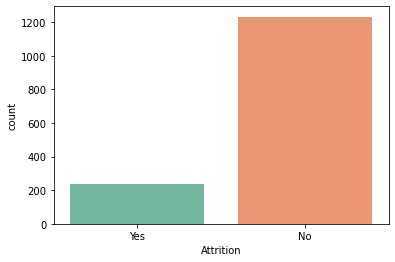

In [7]:
#Check Attrition Rate in Company, #Attrition Rate at 16% for Company, Null Accuracy is at  84% (Predicting the most frequent class)

sns.color_palette("pastel")

AttritionCount = df["Attrition"].value_counts(normalize=True)

print(AttritionCount)

sns.countplot(x="Attrition",data=df, palette='Set2')


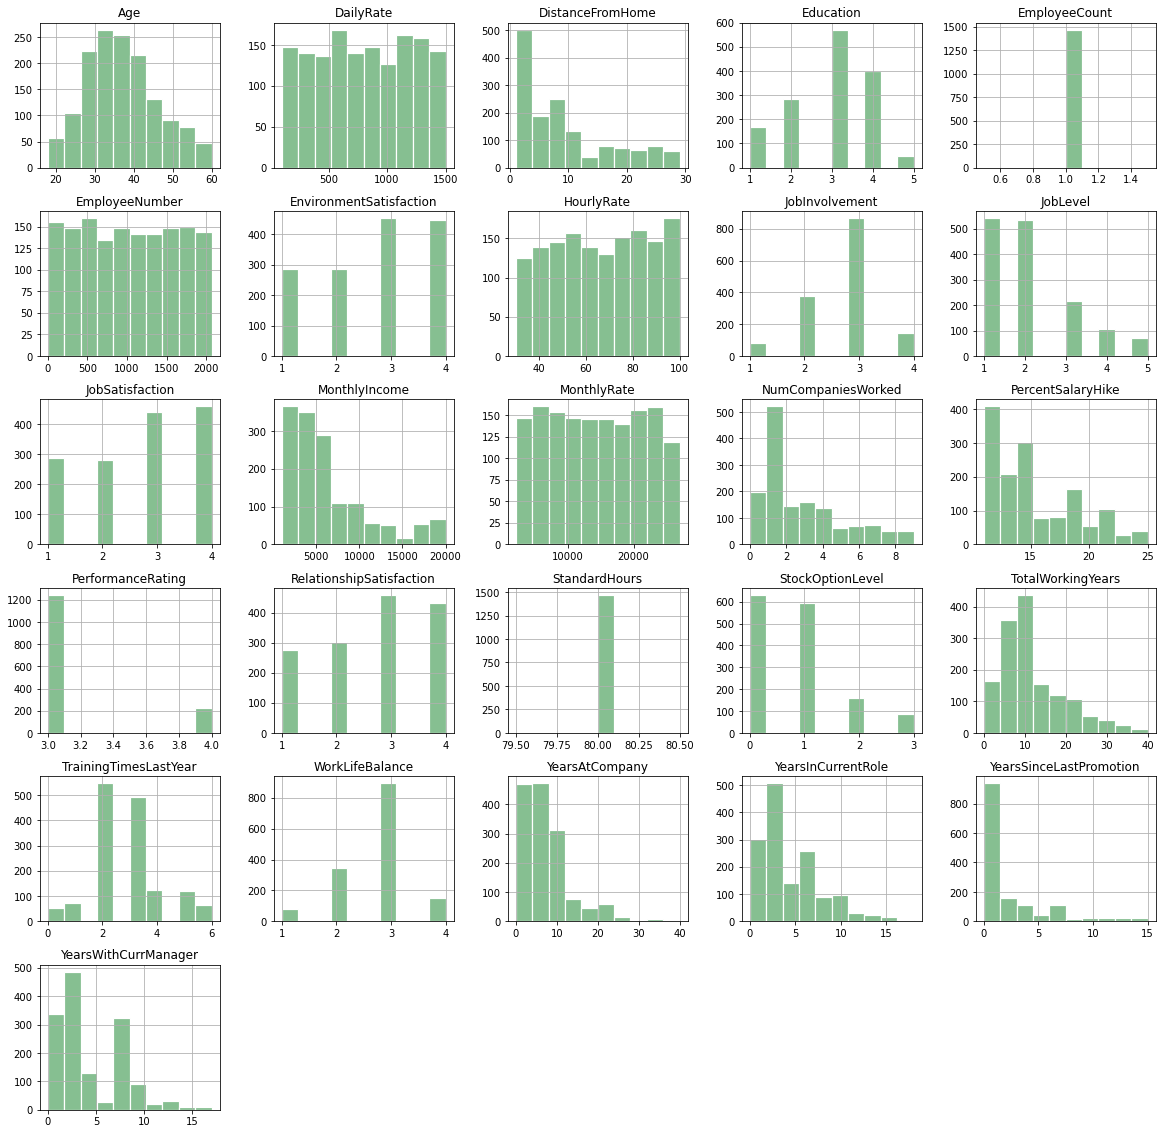

In [8]:
# Visualising every feature in the dataframe, just to get a sense of the distribution
df.hist(edgecolor='white', linewidth=1.2, figsize=(20, 20),color='#86bf91');

# <font color='green'> 3. Data Preprocessing, Feature Engineering and Feature Selection </font>

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64


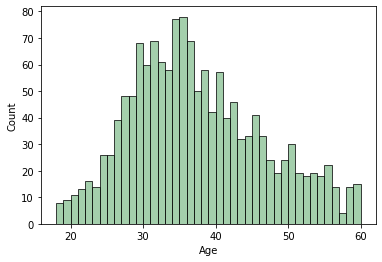

In [9]:
#Check Age Distribution of Employees
sns.histplot(df['Age'], binwidth=1, color='#86bf91')

#Minimum Age is 18, the field "Over 18" is redudant, and can be dropped
print(df['Age'].describe())

In [10]:
#We can bin Age category into catgegorical values based on generations defined in url below

"https://www.pewresearch.org/fact-tank/2020/04/28/millennials-overtake-baby-boomers-as-americas-largest-generation/ft_20-04-27_generationsize_2/"

labels = ['Generation Z','Millennials', 'Generation X', 'Baby Boomers', 'The Silent Generation']

#create a new column for the age group based on pew research

df['Age_group'] = pd.cut(df['Age'], bins=[0,25,41,57,76,100], labels=labels)

df.sort_values(by=["Age","EmployeeNumber"]).head(10)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_group
296,18,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0,Generation Z
301,18,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0,Generation Z
457,18,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0,Generation Z
727,18,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0,Generation Z
828,18,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0,Generation Z
972,18,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,1,1368,4,Female,97,3,1,Laboratory Technician,4,Single,1611,19305,1,Y,No,15,3,3,80,0,0,5,4,0,0,0,0,Generation Z
1153,18,Yes,Travel_Frequently,544,Sales,3,2,Medical,1,1624,2,Female,70,3,1,Sales Representative,4,Single,1569,18420,1,Y,Yes,12,3,3,80,0,0,2,4,0,0,0,0,Generation Z
1311,18,No,Non-Travel,1431,Research & Development,14,3,Medical,1,1839,2,Female,33,3,1,Research Scientist,3,Single,1514,8018,1,Y,No,16,3,3,80,0,0,4,1,0,0,0,0,Generation Z
127,19,Yes,Travel_Rarely,528,Sales,22,1,Marketing,1,167,4,Male,50,3,1,Sales Representative,3,Single,1675,26820,1,Y,Yes,19,3,4,80,0,0,2,2,0,0,0,0,Generation Z
149,19,No,Travel_Rarely,1181,Research & Development,3,1,Medical,1,201,2,Female,79,3,1,Laboratory Technician,2,Single,1483,16102,1,Y,No,14,3,4,80,0,1,3,3,1,0,0,0,Generation Z


In [11]:
#One Hot Encode Fields like Department and Educationfield and Job Role, ensuring that we keep "Curse of Dimensionality in check"
df = pd.get_dummies(df, columns=['Department', "EducationField","JobRole","MaritalStatus","Age_group"], prefix=['Department', "EducationField","JobRole", "MaritalStatus","Age_group"])

#Ordinal Encode Fields like Business Travel

df['BusinessTravel'] .value_counts()

df['BusinessTravel Numeric'] = df["BusinessTravel"].map({'Travel_Frequently':2,'Travel_Rarely': 1, 'Non-Travel': 0, })

df['BusinessTravel Numeric'] .value_counts()

#Create Dummy Variables like Gender Numeric or Overtime Numeric
df['Gender Numeric'] = df["Gender"].map({'Male': 1, 'Female': 0, })

df['Overtime Numeric'] = df["OverTime"].map({'Yes': 1, 'No': 0, })



DailyRate        int64
HourlyRate       int64
MonthlyIncome    int64
MonthlyRate      int64
dtype: object


<AxesSubplot:>

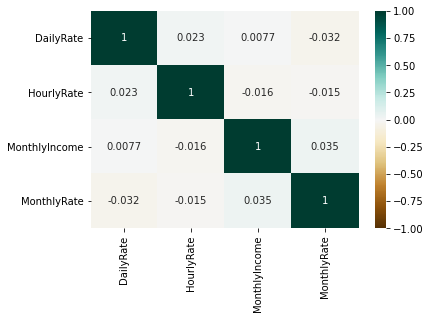

In [12]:
#Daily Rate & Hourly Rate & Monthly Rate & MonthlyIncome are similar fields, might be able to keep 1 field
Income_Salary = df[df.filter(like='Rate').columns | df.filter(like='Income').columns] 

print(Income_Salary.dtypes)

corrMatrix = Income_Salary.corr()

sns.heatmap(corrMatrix, annot=True,xticklabels = True,  vmin=-1, vmax=1, yticklabels= True, cmap='BrBG')

#Investigate Correlation of Pay and Income and determine if they are all required, correlation seems low among them, will keep all

In [13]:
#Drop Ordinal Data like Employee Number and variables like Employee Count and Standard Hours that intutively dont contribute to attrition
#Drop features that have binned or ordinally encoded
#52 Columns in dataset, 51 features and 1 Target
df = df.drop(['EmployeeCount', 'EmployeeNumber','Over18','StandardHours','Age','BusinessTravel','Gender','OverTime'], axis=1)

print(df)

     Attrition  DailyRate  DistanceFromHome  Education  \
0          Yes       1102                 1          2   
1           No        279                 8          1   
2          Yes       1373                 2          2   
3           No       1392                 3          4   
4           No        591                 2          1   
...        ...        ...               ...        ...   
1465        No        884                23          2   
1466        No        613                 6          1   
1467        No        155                 4          3   
1468        No       1023                 2          3   
1469        No        628                 8          3   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                           2          94               3         2   
1                           3          61               2         2   
2                           4          92               2         1   
3                  

In [14]:
#Encode the target variable to 0 or 1

df["Attrition Numeric"] = df["Attrition"].map({'Yes': 1, 'No': 0})

print(df["Attrition Numeric"])

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition Numeric, Length: 1470, dtype: int64


In [15]:
print(df.describe())

print(df.shape)

         DailyRate  DistanceFromHome    Education  EnvironmentSatisfaction  \
count  1470.000000       1470.000000  1470.000000              1470.000000   
mean    802.485714          9.192517     2.912925                 2.721769   
std     403.509100          8.106864     1.024165                 1.093082   
min     102.000000          1.000000     1.000000                 1.000000   
25%     465.000000          2.000000     2.000000                 2.000000   
50%     802.000000          7.000000     3.000000                 3.000000   
75%    1157.000000         14.000000     4.000000                 4.000000   
max    1499.000000         29.000000     5.000000                 4.000000   

        HourlyRate  JobInvolvement     JobLevel  JobSatisfaction  \
count  1470.000000     1470.000000  1470.000000      1470.000000   
mean     65.891156        2.729932     2.063946         2.728571   
std      20.329428        0.711561     1.106940         1.102846   
min      30.000000       

# <font color='green'> Methods and Improvements - Model Building,Tuning, Results and Analysis</font>

In [16]:
#Create X Dataframe, remove the target

x = df.drop(["Attrition","Attrition Numeric"], axis=1)
print(x.shape)
print(x.columns)

#Create Y /Target Variable

y= df["Attrition Numeric"]

print(y.shape)

(1470, 51)
Index(['DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'Jo

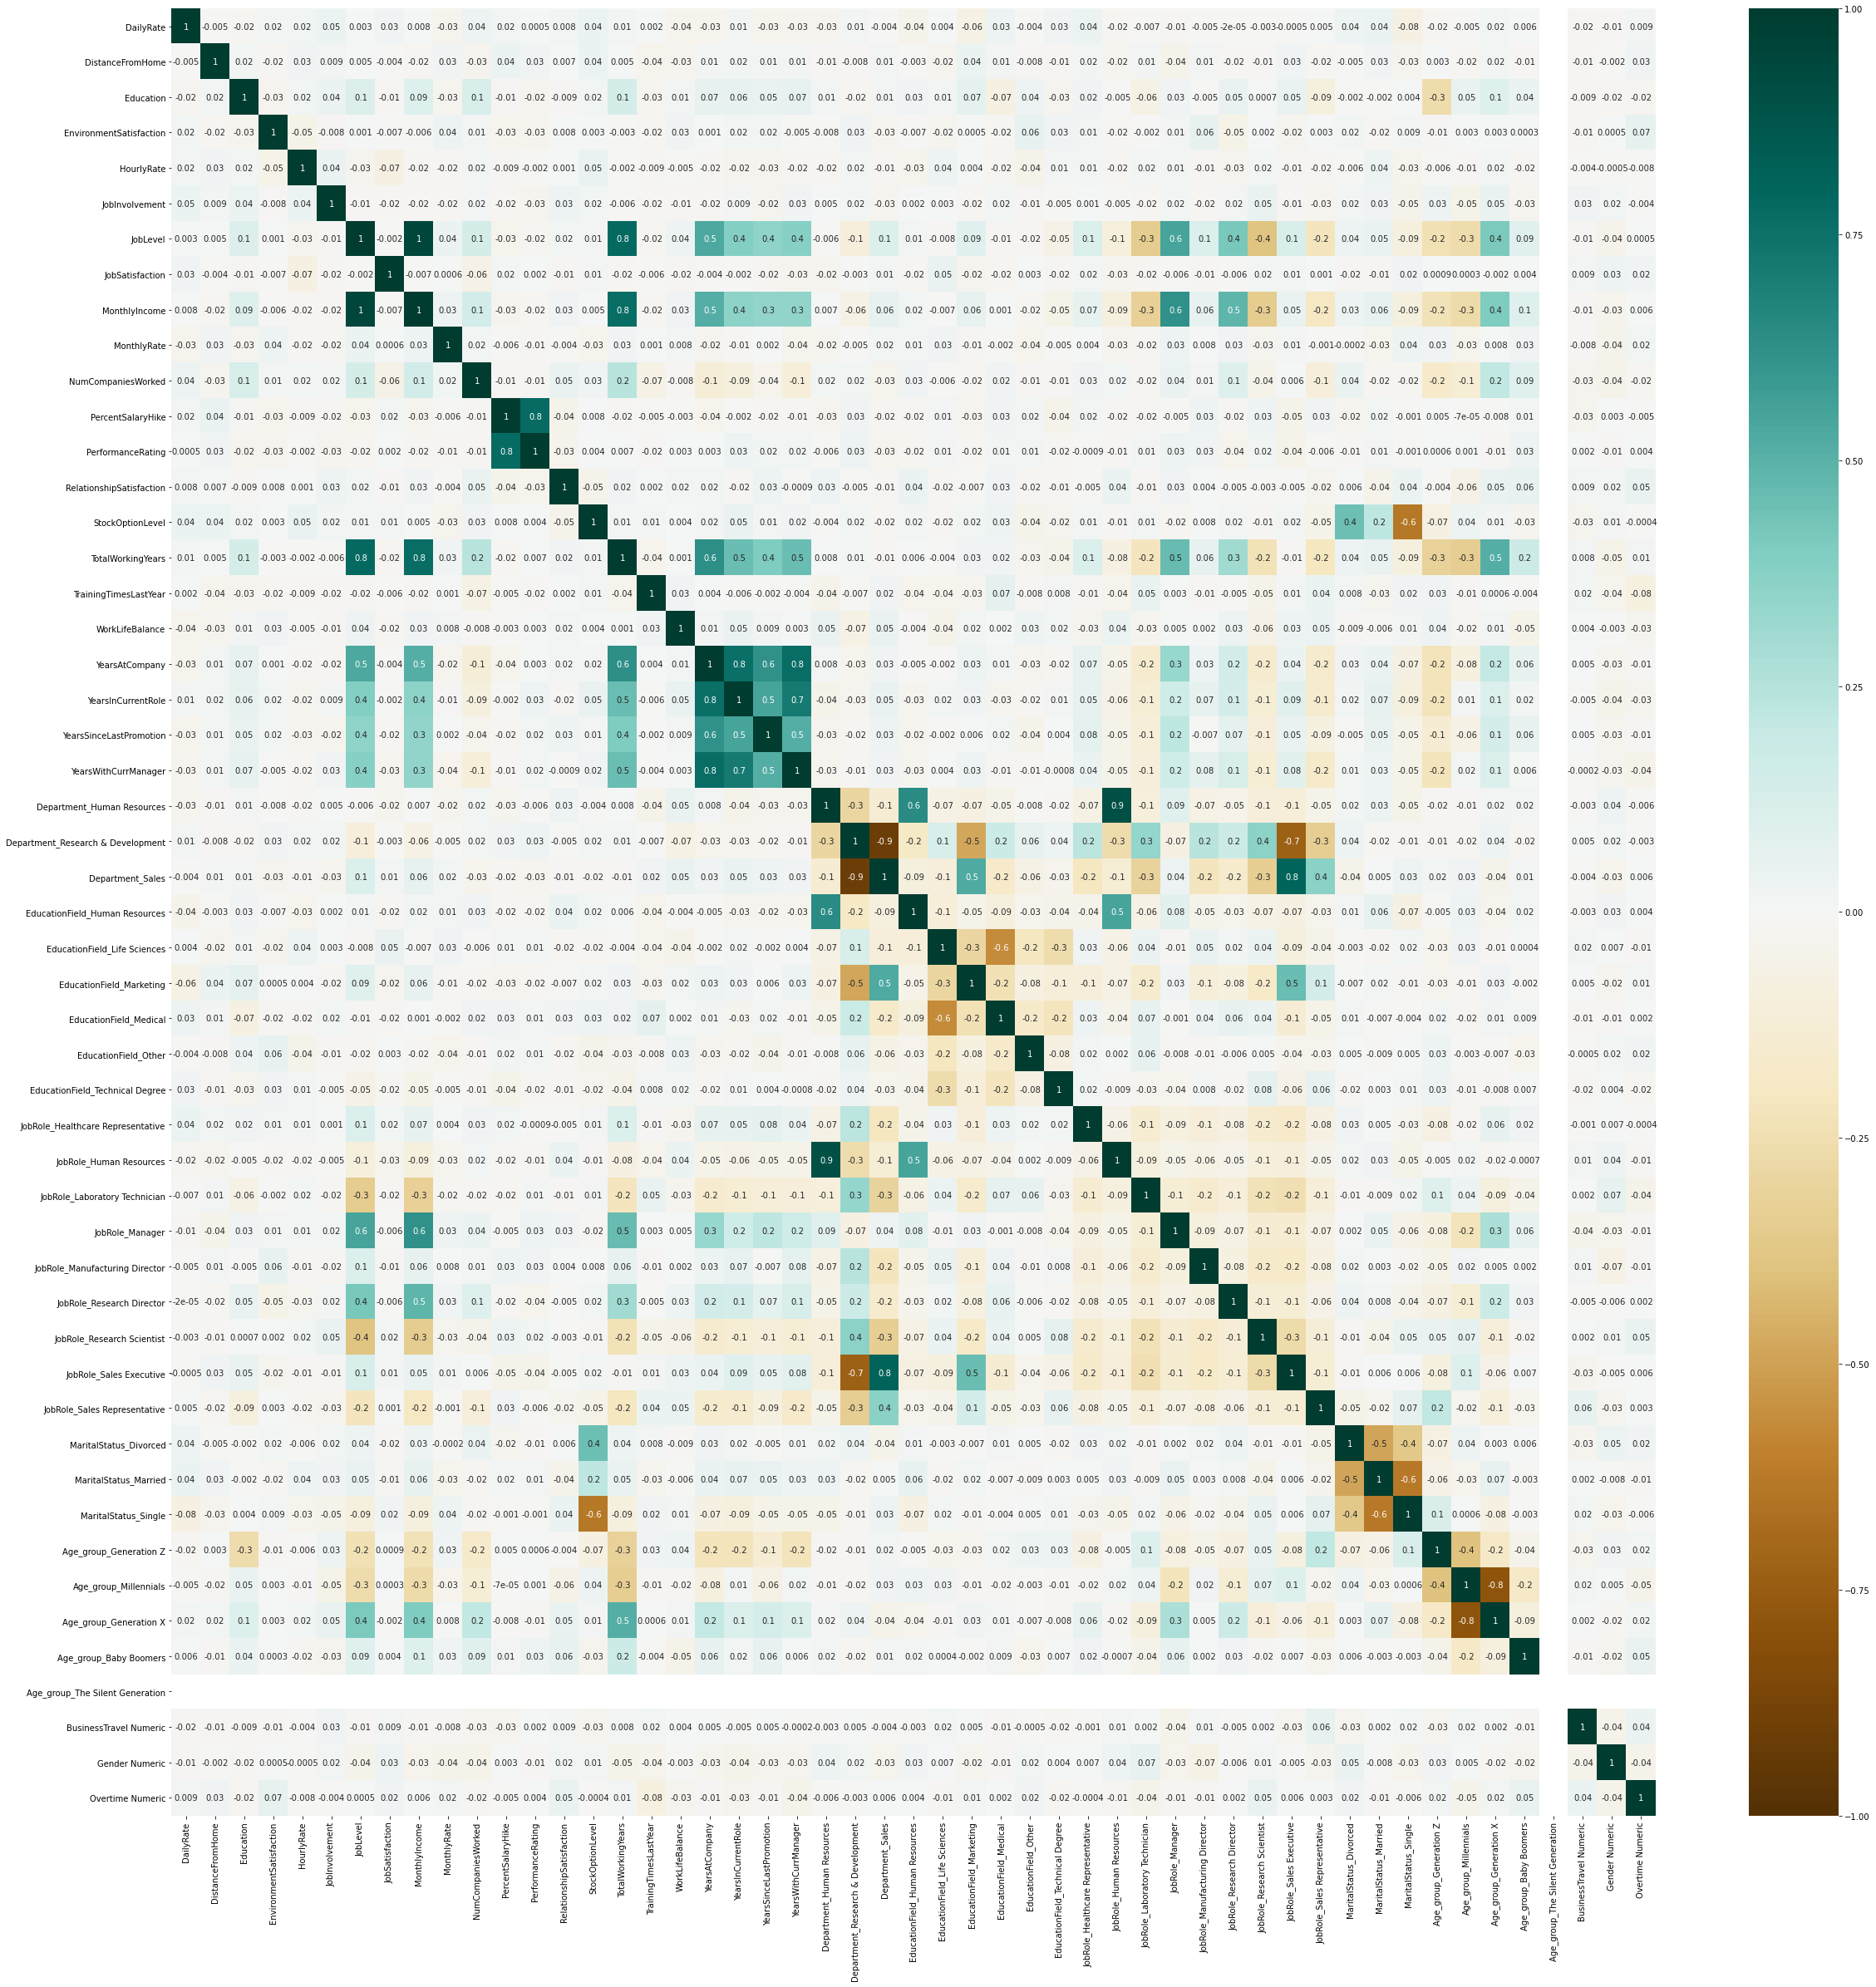

In [17]:
#Feature Selection using correlation matrix as guide
#Darker Shades correspond to correlation
plt.figure(figsize=(40,40))
corr = x.corr()

sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(corr, annot=True,vmin=-1, vmax=1, cmap='BrBG',xticklabels = True, yticklabels= True, fmt='.1g')

plt.show()

In [18]:
#Feature Selection using Correlation, and remove those we high correlation with one and another
corr_abs = x.corr().abs()
high_corr_var=np.where(corr_abs>0.8)
high_corr=[(corr_abs.columns[x],corr_abs.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
print(high_corr)

[('JobLevel', 'MonthlyIncome'), ('Department_Human Resources', 'JobRole_Human Resources'), ('Department_Research & Development', 'Department_Sales'), ('Department_Sales', 'JobRole_Sales Executive')]


In [19]:
#Drop highly correlated columns, and slient generation column
#df = df.drop(['MonthlyIncome', 'Department_Sales','Department_Human Resources','Age_group_The Silent Generation'], axis=1)
#Remove Target
x = df.drop(['MonthlyIncome', 'Department_Sales','Department_Human Resources','Age_group_The Silent Generation',"Attrition","Attrition Numeric"], axis=1)

print(x.shape)
print(x.columns)

#Create Y /Target Variable

y= df["Attrition Numeric"]

print(y.shape)

(1470, 47)
Index(['DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Department_Research & Development',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sale

In [20]:
#Create Train & Test Set
validation_size = 0.20
seed = 7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=validation_size, random_state=seed, stratify = y)
#ensure similar % leave in train and in test


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1176, 47)
(294, 47)
(1176,)
(294,)


In [21]:
#Set train test split parameters, and test variety of models to see which has the highest accuracy scores
validation_size = 0.20
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('XGB', XGBClassifier(objective='binary:logistic',use_label_encoder=False,eval_metric='mlogloss')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('ETC',ExtraTreesClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
models.append(('LGBM',LGBMClassifier()))
    
# evaluate each model through the loop
results = []
names = []

for name, clf in models:
    cv_results = cross_val_score(clf, x_train, y_train, cv=5, scoring=scoring) 
    results.append(cv_results.mean())
    names.append(name)
    
results_name_df = pd.DataFrame(list(zip(results,names)), columns = ['results','names']).sort_values(by='results', ascending=False)

print(results_name_df)

#

    results names
0  0.879264    LR
2  0.856289   XGB
8  0.855438   GBC
5  0.854594    RF
9  0.854591  LGBM
7  0.853747   ETC
6  0.838435   SVM
1  0.823123   KNN
4  0.793401    NB
3  0.793379  CART


{'C': 0.25,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 2000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}
0.8809628561125136


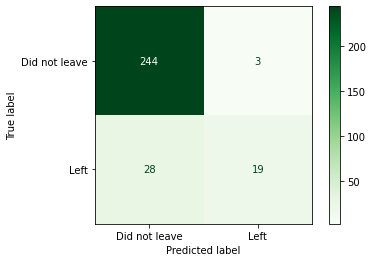

In [22]:
# Tune hyperparameters of logistic regression using randomisedcv
# Set up the sample space 

penalty = ['l1','12','elasticnet','None']
solver = ['lbfgs','liblinear','newton-cg','saga']
C = [10, 5, 2.5, 1.0, 0.5, 0.25, 0.1]
max_iter=   [2000, 3000,4000,5000,6000,7000,8000]

lr_clf = LogisticRegression()

# Create the grid 
parameter_grid = {'penalty':penalty,'C':C,'solver':solver, 'max_iter' : max_iter}

clf = GridSearchCV(estimator = lr_clf, param_grid = parameter_grid, scoring='accuracy', n_jobs=8, cv = 5, refit=True, return_train_score=True,random_state = 10)

# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(x_train, y_train)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

pprint(model.best_score_)

best = clf.best_estimator_
best.fit(x_train, y_train)
y_pred = best.predict(x_test)
    
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(clf,x_test,y_test,values_format='d', display_labels=["Did not leave","Left"], cmap='Greens')


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
0.8622538766678687


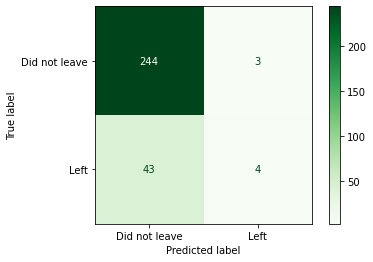

In [23]:
# Tune hyperparameters using randomisedcv
# Set up the sample space 

N_estimators = [5,10,15,25,30]
Max_features = ['auto','sqrt','log2']
Max_depth = [5,10,15,20,25,30]
Min_samples_split = [2,6,10,14,20]
Min_samples_leaf =   [2,4,6,8,10]

rf_clf = RandomForestClassifier()

# Create the grid 
parameter_grid = {'n_estimators':N_estimators,'max_features':Max_features,'max_depth':Max_depth, 'min_samples_leaf' : Min_samples_leaf,
'min_samples_split':Min_samples_split}   

# this will train 100 models over 5 folds of cross validation (500 models total)
#clf = RandomizedSearchCV(rf_clf, parameter_grid, n_iter=100, cv=5, random_state=10)

clf = GridSearchCV(estimator = rf_clf, param_grid = parameter_grid, scoring='accuracy', n_jobs=8, cv = 5, refit=True, return_train_score=True, random_state = 10)

# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(x_train, y_train)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

pprint(model.best_score_)

best = clf.best_estimator_
best.fit(x_train, y_train)
y_pred = best.predict(x_test)
    
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(clf,x_test,y_test,values_format='d', display_labels=["Did not leave","Left"], cmap='Greens')
                   

Text(0, 0.5, 'Feature Importance Score')

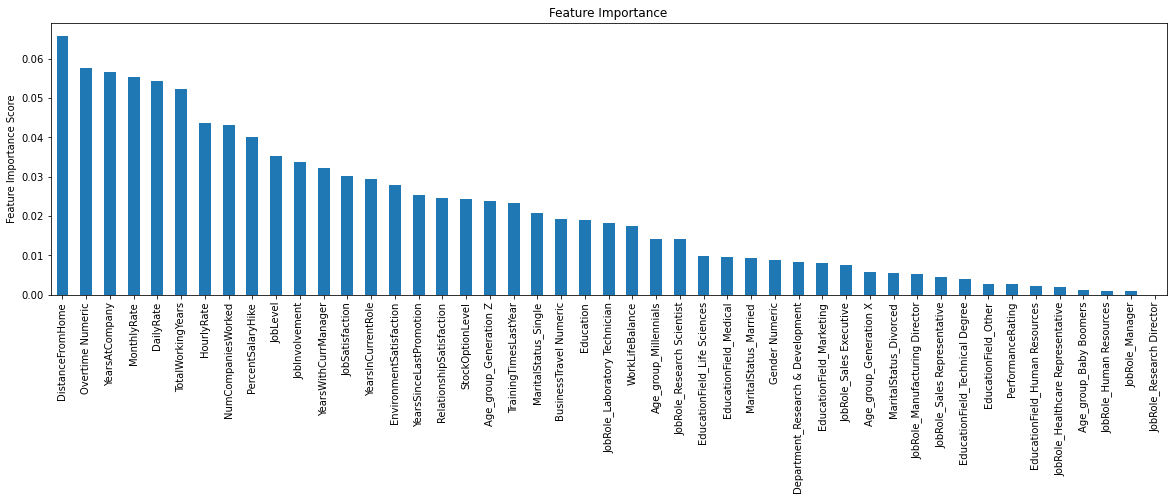

In [24]:
#Check for feature importance
feat_imp = pd.Series(best.feature_importances_, index=x_test.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importance',figsize=(20, 5))
plt.ylabel('Feature Importance Score')


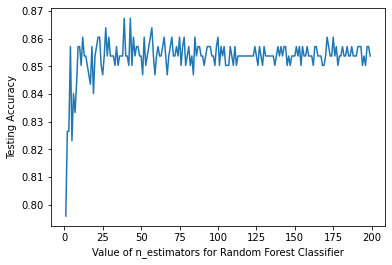

In [25]:
scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

plt.show()


{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'init': None,
 'learning_rate': 0.05,
 'loss': 'deviance',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 14,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 25,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 0.6,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}
0.8588460151460511


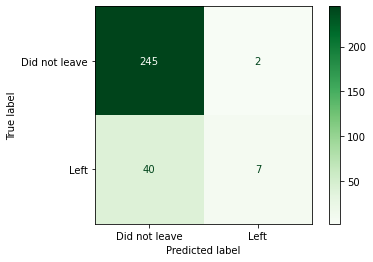

In [26]:
# Tune hyperparameters for Gradient Boosting 
# Tune hyperparameters using randomisedc
# Set up the sample space 

N_estimators = [5,10,15,25,30]
Max_features = ['auto','sqrt','log2']
Max_depth = [5,10,15,20,25]
Min_samples_split = [2,6,10,14,20]
Min_samples_leaf =   [2,4,6,8,10]
subsample = [0.6,0.7,0.75,0.8,0.85]
criterion = ['mse']
learning_rate = [0.001,0.005,0.01,0.02,0.05]


gbc_clf = GradientBoostingClassifier()

# Create the grid 
parameter_grid = {'n_estimators':N_estimators,'max_features':Max_features,'max_depth':Max_depth, 'min_samples_leaf' : Min_samples_leaf,
'min_samples_split':Min_samples_split,'subsample':subsample, 'criterion':criterion, 'learning_rate':learning_rate}

# RandomizedSearchCV
clf = RandomizedSearchCV(gbc_clf, parameter_grid, n_iter=300, cv=5,scoring='accuracy', random_state=10)

#clf = GridSearchCV(estimator = gbc_clf, param_grid = parameter_grid, scoring='accuracy', n_jobs=8, cv = 5, refit=True, return_train_score=True)

# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(x_train, y_train)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

pprint(model.best_score_)

best = clf.best_estimator_
best.fit(x_train, y_train)
y_pred = best.predict(x_test)
    
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(clf,x_test,y_test,values_format='d', display_labels=["Did not leave","Left"],cmap='Greens')


{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.9,
 'eta': 0.01,
 'eval_metric': 'mlogloss',
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.00999999978,
 'max_delta_step': 0,
 'max_depth': 10,
 'min_child_weight': 3,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 5,
 'n_jobs': 16,
 'num_parallel_tree': 1,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.75,
 'tree_method': 'exact',
 'use_label_encoder': False,
 'validate_parameters': 1,
 'verbosity': None}
0.8639596105301118


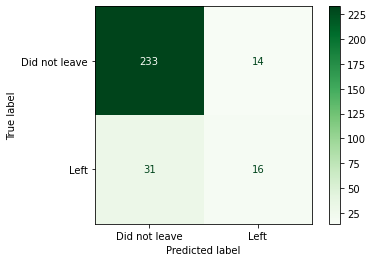

In [27]:
# Tune hyperparameters for XGBoosting 


param_grid = {'n_estimators':  [5,10,15,25,30],
              'eta':  [0.01,0.02,0.03],
              'subsample': [0.6,0.7,0.75,0.8,0.85],
              'max_depth': [5,10,15,20,25],
              'colsample_bytree': [0.5,0.6,0.7,0.8,0.9],
              'min_child_weight': [1, 2, 3, 4]}

# n_estimators20,30,30,100
#Use randomized to high level exploration, use gridsearch best parameters

xgbc_clf = XGBClassifier(objective='binary:logistic',use_label_encoder=False,eval_metric='mlogloss')


# Perform random search: accuracy
#clf = RandomizedSearchCV(param_distributions=param_grid , estimator=xgbc_clf, scoring='accuracy', n_iter=300, cv=5, verbose=1)

clf = GridSearchCV(estimator = xgbc_clf, param_grid = param_grid, scoring='accuracy', n_jobs=8, cv = 5, refit=True, return_train_score=True)


# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(x_train, y_train)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

pprint(model.best_score_)

best = clf.best_estimator_
best.fit(x_train, y_train)
y_pred = best.predict(x_test)
    
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(clf,x_test,y_test,values_format='d', display_labels=["Did not leave","Left"],cmap='Greens')



# <font color='green'> 5. Results and Analysis - Conclusion</font>

Using 1176 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/294 [00:00<?, ?it/s]

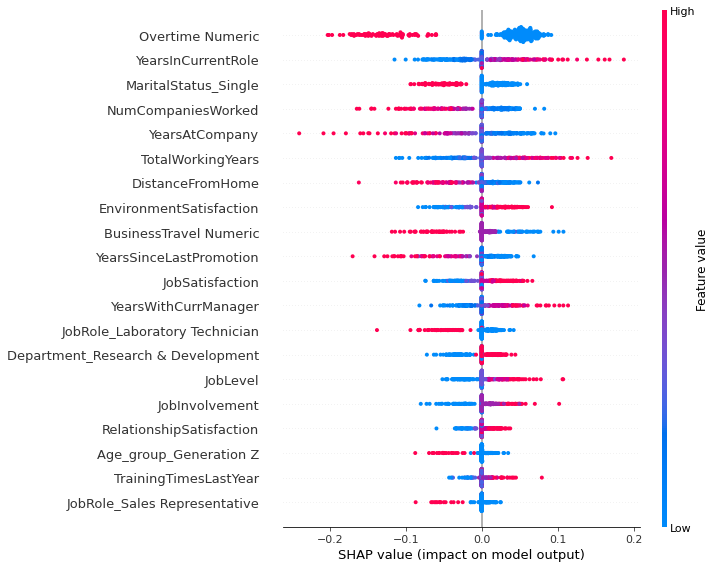

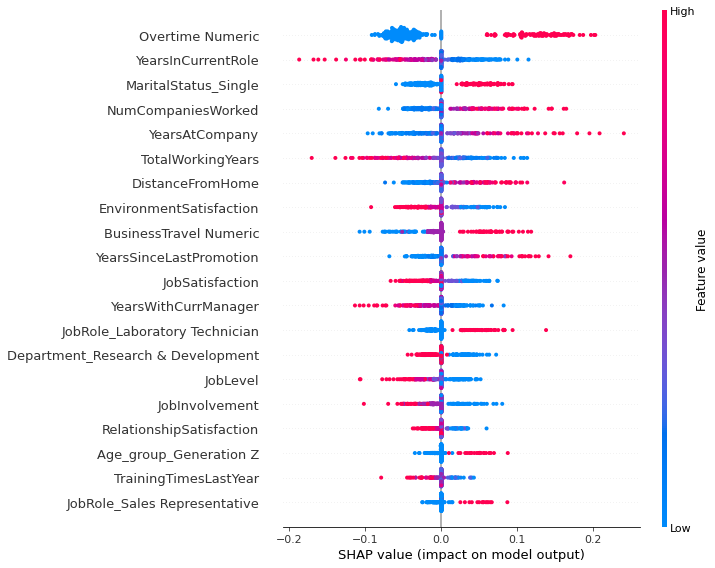

In [32]:
# Use SHAP KernelExplainer to explain the model results
#Create Train & Test Set
validation_size = 0.20
seed = 7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=validation_size, random_state=seed, stratify = y)

param = {'C': 0.25,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 2000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

lr_clf = LogisticRegression(C= 0.25,max_iter= 2000,penalty= 'l1',solver= 'liblinear')

# train the random search meta-estimator to find the best model out of 100 candidates
model = lr_clf.fit(x_train, y_train)

#x_train = shap.kmeans(x_train, 50) 

# Create object that can calculate shap values
explainer = shap.KernelExplainer(model.predict_proba, x_train)

shap_values = explainer.shap_values(x_test,nsamples=100)

shap.summary_plot(shap_values[0],x_test)

shap.summary_plot(shap_values[1],x_test)


### From the Summary Plot for those that left the organisation, the probaility of attrition is increased with:

<li><b>Overtime</b> Employees working long hours, might want to quit </li>
<li><b>Lower Years in Current Role</b> - Employees that stay tend to have higher years in their current role</li>
<li><b>Single</b> - Single Employees have less responsibilities compared to Married, change jobs due to less certainty</li> 
<li><b>NumCompaniesWorked</b> Employees with more companies might be a symptom of job hopping</li>
<li><b>Total Working Years</b> Employees with more companies might be a symptom of job hopping</li>    
<li><b>Distance from Home</b> Employees live further will leave because of highercommuting time</li>    
<li><b>Environment Satisfaction</b> Employees not satisfied with environment will leave</li>
<li><b>Business travel</b> Employees not satisfied with higher amounts of business travel</li>
<li><b>YearsSinceLastPromotion</b> Employees not satisfied with no promotion, will leave, looking for outside opportunities</li> 
<li><b>Laboratory Technician</b> Some jobs have higher attrition</li> 
<li><b>Research & Development</b> Some department have higher attritionn</li> 
</ol>
